# Advanced Time-Series Analysis and Deep Learning: Homework #3

## Motif Discovery

### Mathematical Formulation

(a): In time-series data, motifs are pairs of individual time series, or subsequences of longer time series, which are very similar to each other. A motif can tell us about recurring patterns within time series data!

(b): 
Let me formulate this mathematically. 

Case 1: Time Series Motif

I will define a time series $T$ where $T = [t_1, t_2, ...., t_n ]$ consists of a set of $n$ real numbers. 

A Time Series Database $D$ is an unordered set of m time series possibly of different lengths.

The Time Series Motif of $D$ is the unordered pair of time series ${T_i, T_j}$ in D which is the most similar among all possible pairs

Essentially, $\forall a,b,i,j$, 

${T_i, T_j}$ is the motif iff $dist(T_i, T_j) ≤ dist(T_a, T_b)$, $i \neq j$ and $a \neq b$.


Case 2: Subsequence Motif

We can also calculate a Subsequence Motif. Given a time series $T$ where $T = [t_1, t_2, ...., t_n ]$ consists of a set of $n$ real numbers. 
Let's say we have two subsequences $T_c$ and $T_d$

Essentially, $\forall c,d,i,j$, 

${T_c, T_d}$ is the subsequence motif iff $dist(T_c, T_d) ≤ dist(T_i, T_j)$, $i \neq j$ and $a \neq b$.



### Synthetic Data Generation

In [81]:
import numpy as np
### First Generate sine curve
n = 201

# t => [0, 10 * pi]
t = np.linspace(start = 0, stop = 20 * np.pi, num = n, endpoint = True)
x = np.sin(t)

#Generate Noise
noise = np.random.normal(loc = 0, scale = 2, size = (n,))

#Embed Motif
timestep = 10

for i in range(1, n // timestep, 8):
    pivot = timestep * i
    time_slice = t[pivot - 6 : pivot + 6]
    noise[pivot - 6 : pivot + 6] = np.cos(time_slice)
    print(np.rad2deg(time_slice) % 360, i)

x_adjusted = x + noise

[ 72.  90. 108. 126. 144. 162. 180. 198. 216. 234. 252. 270.] 1
[ 72.  90. 108. 126. 144. 162. 180. 198. 216. 234. 252. 270.] 9
[ 72.  90. 108. 126. 144. 162. 180. 198. 216. 234. 252. 270.] 17


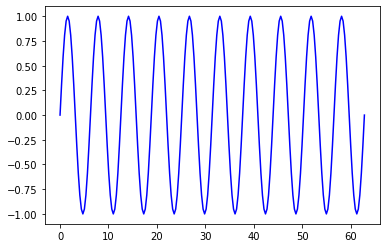

In [82]:
import matplotlib.pyplot as plt
plt.plot(t, x, label='sin(x)', color='blue', linestyle='-')

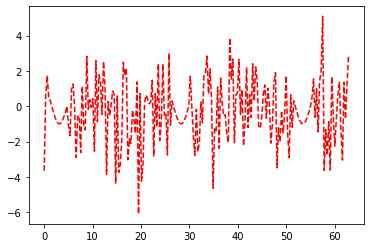

In [83]:
plt.plot(t, noise, label='noise', color='red', linestyle='--')


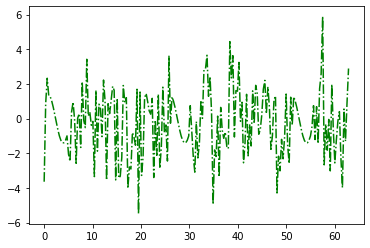

In [84]:
plt.plot(t, x_adjusted, color='green', linestyle='-.')  

## Matrix Profile

General Concept: 
In time series analysis, a matrix profile is used to find anomalies and trends within time series data. 

Mathematical Formulation: 

1. I will define a time series $T$ where $T = [t_1, t_2, ...., t_n ]$ consists of a set of $n$ real numbers. 

2. A subsequence $T_{i,m}$ of a T is a continuous subset of the values from T of length m starting from position i. $T_{i,m} = t_i, t_{i+1} ,…, t_{i+m-1}$, where $1 \leq i \leq n-m+1$.

3. A distance profile D is a vector of the Euclidean distances between a given query and each subsequence in an all-subsequences set

4. An all-subsequences set A of a time series T is an ordered set of all possible subsequences of T obtained by sliding a window of length m across T: 

$A ={T_{1,m},, T_{2,m},…, T_{n-m+1,m}}$, where m is a user-defined subsequence length. We use A[i] to denote $T_{i,m}$.

5. 1NN-join function: given two all-subsequences sets A and B and two subsequences A[i] and B[j], a 1NN-join function $\theta_{1nn}$ (A[i], B[j]) is a Boolean
function which returns “true” only if B[j] is the nearest neighbor of A[i] in the set B.

6. Similarity join set: given all-subsequences sets A and B, a similarity join set $J_{AB}$ of A and B is a set containing pairs of each subsequence in A with its nearest neighbor in B: $J_{AB}={〈 A[i], B[j] 〉| θ_{1nn} (A[i], B[j])}$ . We denote this formally as $J_{AB} = A \bowtie_{\theta_{1nn}} B$.

7. A matrix profile (or just profile) $P_{AB}$ is a vector of the Euclidean distances between each pair in $J_{AB}$

### Algorithm Implementation

In [85]:
def generate_subsequences_set(T, M):
    N = len(T) - M + 1
    indices = np.arange(M) + np.arange(N)[:, np.newaxis]
    return T[indices]

T = x_adjusted
M = 12

A = generate_subsequences_set(T, M)

def generate_matrix_profile(A, M):
    N = len(A)
    
    exclusion = np.ceil(M / 2)
    distances = np.zeros(shape = (N,))
    indices = np.zeros(shape = (N,))
    
    for i in range(N):
        bound1 = max(0, i - exclusion)
        bound2 = min(i + exclusion, N - 1)
        
        min_distance = float('inf')
        min_index = None
        
        for j in range(N):
            if bound1 <= j and j <= bound2: continue 
            d = np.linalg.norm(A[i] - A[j])
            if d < min_distance:
                min_distance = d
                min_index = j
        
        distances[i] = min_distance
        indices[i] = min_index
    
    return distances, indices

generate_matrix_profile(A, M)

(array([3.07741805e+00, 2.49221482e+00, 2.02329225e+00, 1.02508423e+00,
        5.57327535e-15, 1.46775303e+00, 2.35253056e+00, 2.47892985e+00,
        2.52308549e+00, 2.62695465e+00, 2.81410881e+00, 3.27880509e+00,
        3.55881952e+00, 3.87471214e+00, 4.33981026e+00, 4.33899346e+00,
        4.24233559e+00, 4.93382476e+00, 4.91483880e+00, 5.32974962e+00,
        4.87756304e+00, 4.35890243e+00, 4.35823598e+00, 5.14281199e+00,
        5.03774484e+00, 5.42864709e+00, 5.37633271e+00, 5.03860110e+00,
        4.75080374e+00, 4.40992466e+00, 5.17943683e+00, 5.31078783e+00,
        5.28928755e+00, 5.30040265e+00, 5.20212069e+00, 4.65545160e+00,
        5.18688799e+00, 5.14281199e+00, 5.36591404e+00, 6.31532350e+00,
        6.12967092e+00, 6.13026539e+00, 5.87091372e+00, 5.92780727e+00,
        6.31028986e+00, 6.81559680e+00, 6.61822264e+00, 6.55842274e+00,
        6.34878950e+00, 5.97696715e+00, 5.18650521e+00, 5.16172057e+00,
        6.59495942e+00, 6.56767862e+00, 6.85023203e+00, 6.413459

### Matrix Profile Algorithm Implementation

In [86]:
distance_profile, index_profile = generate_matrix_profile(A, M)

#To find a motif, we need to find a minimum value in the distance profile 
ix = np.where(distance_profile == np.min(distance_profile))[0]

index_profile_ix = index_profile[ix]
distance_profile_ix = distance_profile[ix]

print(ix)
print(index_profile_ix)
print(distance_profile_ix)

[ 4 84]
[84.  4.]
[5.57327535e-15 5.57327535e-15]


### Optimized Matrix Profile Algorithm Implementation

In [87]:
### Optimize Matrix Profile Algorithm using FFT Approach outlined in paper
def sliding_dot_product(Q, T):
    n, m = len(T), len(Q)
    Ta = np.append(T, np.zeros(n))
    Qr = np.flip(Q)
    Qra = np.append(Qr, np.zeros(2 * n - m))
    Qraf, Taf = np.fft.fft(Qra), np.fft.fft(Ta)
    QT = np.fft.ifft(Qraf * Taf)
    return QT

def compute_mean_std(Q, T):
    uq = np.mean(Q)
    stdev_Q = np.std(Q)
    n,m = len(T), len(Q)
    
    M = np.zeros(shape = (n - m + 1,))
    Sigma = np.zeros(shape = (n - m + 1,))
    window = T[0:m]
    
    M[0] = np.mean(window)
    Sigma[0] = np.std(window)
    
    total = np.sum(window)
    total_elements_squared = np.sum(window ** 2)
    
    window_start = 0
    window_end = m - 1
    
    for index in range(1, n - m + 1):
        total = total - T[window_start] + T[window_end + 1]
        total_elements_squared = total_elements_squared - (T[window_start] ** 2) + (T[window_end + 1] ** 2)
        
        M[index] = total / m
        Sigma[index] = np.sqrt((total_elements_squared - (2 * M[index] * total) + ((M[index] ** 2) * m)) / m)
        
        window_start += 1
        window_end += 1
    
    return uq, stdev_Q, M, Sigma

def calculate_distance_profile(Q, T, QT, uq, stdev_Q, M, Sigma):
    n,m = len(T), len(Q)
    QT = QT[m - 1: n]
    D = np.sqrt(2 * m * (1 - ((QT - m * uq * M) / (m * stdev_Q * Sigma))))
    return D

def MASS(Q, T):
    QT = sliding_dot_product(Q, T)
    uq, stdev_Q, M, Sigma = compute_mean_std(Q, T)
    D = calculate_distance_profile(Q, T, QT, uq, stdev_Q, M, Sigma)
    return D
    
T2 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
Q2 = np.array([2,3,4])

MASS(Q2, T2)

array([1.78619547e-08+1.10947997e-07j, 1.13654609e-07+5.99290983e-08j,
       7.43863613e-08+8.28589064e-08j, 9.45492244e-08+1.01350005e-07j,
       7.47689500e-08+8.32025451e-08j, 2.09552548e-07+5.11074752e-08j,
       1.25569386e-08-3.85997971e-08j, 8.52499328e-08-9.27352073e-08j])

## Discord Identification

1. Time series discords are subsequences of longer time series that are maximally different to the rest of the time series subsequences. 

Mathematical Formulation: 

- I will define a time series $T$ where $T = [t_1, t_2, ...., t_n ]$ consists of a set of $n$ real numbers. 

- We can define a subsequence $C$ of length $m$, where $m \leq n$, which is a contiguous slice from $T$. 

$C = [t_p, t_{p + 1}, ...., t_{p+n-1}]$ for $1 \leq p \leq m - n + 1$

- Given two subsequences, $C$ and $B$, we can define a function $D$ such that $D(B, C) = R$ where $R$ is a non-negative number and represents the distance between $B$ and $C$. 

- Non-Self Match: : Given a time series T, containing a subsequence C of length n beginning at position p and a matching subsequence B beginning at q, we say that B is a non-self match to C at distance of $D(B, C)$ if $|p - q| \geq n$

- Time Series Discord: Given a time series T, the subsequence A of length n beginning at position $i$ is said to be the discord of T if A has the largest distance to its nearest non-self match. $\forall C \in T$, let $M_C$ be any arbitrary non-self match of $C$ and $M_A$ be any arbitrary non-self match of $A$. We want the following to be true: 

$min(D(A, M_D)) > min(D(C, M_C))$


### Implementation of Discord Identification Algorithm

In [88]:
distance_profile, index_profile = generate_matrix_profile(A, M)

#To find a motif, we need to find a minimum value in the distance profile 
ix = np.where(distance_profile == np.max(distance_profile))[0]

index_profile_ix = index_profile[ix]
distance_profile_ix = distance_profile[ix]

print(ix)
print(index_profile_ix)
print(distance_profile_ix)

[180]
[142.]
[7.18412897]


### HOT SAX

In [89]:
#Define Gaussian Distribution
mean = np.mean(T)
var = np.var(T)
stdev = np.sqrt(var)

# mean - 2 * stdev [A], mean - stdev [B], mean [C], mean + stdev [D], mean + 2 * stdev [E]
def discretize_window(window):
    u = np.mean(window)
    if u <= mean - 2 * stdev:
        return 'A'
    elif u <= mean - stdev:
        return 'B'
    elif u <= mean:
        return 'C'
    elif u <= mean + stdev:
        return 'D'
    elif u <= mean + 2 * stdev:
        return 'E'
    else:
        return 'F'

def generate_word(T, P):
    return np.apply_along_axis(discretize_window, axis = 1, arr = generate_subsequences_set(T, P)).flatten()


P = 3 #window length to generate SAX encoding
W = generate_word(T, P)

L = M // P #letter subsequence length

#M = 12, hence, we are working with 4 letter subsequences here
A = generate_subsequences_set(W, L)

def edit_distance(W1, W2):
    if len(W2) == 0:
        return len(W1)

    if len(W1) == 0:
        return len(W2)
    
    if W1[0] == W2[0]:
        return edit_distance(W1[1:], W2[1:])
    
    return 1 + min(edit_distance(W1[1:], W2), edit_distance(W1, W2[1:]), edit_distance(W1[1:], W2[1:]))


def generate_SAX_matrix_profile(A, L):
    N = len(A)
    
    exclusion = np.ceil(L / 2)
    distances = np.zeros(shape = (N,))
    indices = np.zeros(shape = (N,))
    
    for i in range(N):
        bound1 = max(0, i - exclusion)
        bound2 = min(i + exclusion, N - 1)
                
        min_distance = float('inf')
        min_index = None
        
        for j in range(N):
            if bound1 <= j and j <= bound2: continue 
            d = edit_distance(A[i], A[j])
            if d < min_distance:
                min_distance = d
                min_index = j
        
        distances[i] = min_distance
        indices[i] = min_index
    
    return distances, indices

# print(W)
# print(A)
distance_profile, index_profile = generate_SAX_matrix_profile(A, M)
print(distance_profile)
print(index_profile)

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 2. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 2.
 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
[124. 125.  22.  23.  23.  28.  29.  18.  19.  19.  19.  19.  19.  57.
  57.  31.  71.  72.   7.   8.  31.  32.  33.   3.   3.   3.   3.   3.
   5.   6.   7.  15.  21.  22.   3.   3.   3.   5.   6. 147.  21.  22.
   3.   3.   5.   6. 108.  60.  15.  21.  76.   6. 108.  60.  47. 110.
 111.   8.   8.   8.  47. 110.  15.  21.  22.   3.   3.   5.   6.   7.
  15.  16.  17.   7.  15.  21.  50. 139. 140.  

In [90]:
#To find a motif, we need to find a minimum value in the distance profile 
ix = np.where(distance_profile == np.min(distance_profile))[0]

index_profile_ix = index_profile[ix]
distance_profile_ix = distance_profile[ix]

print(ix)
print(index_profile_ix)
print(distance_profile_ix)

[  0   1   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  50  51  52  56  57  58  60
  61  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79
  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 106 107 108 109 110 111 112 113 114 115 116 117 124
 125 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 177 178 179 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195]
[124. 125.  23.  23.  28.  29.  18.  19.  19.  19.  19.  19.  57.  57.
  31.  71.  72.   7.   8.  31.  32.  33.   3.   3.   3.   3.   3.   5.
   6.   7.  15.  21.  22.   3.   3.   3.   5.   6. 147.  21.  22.   3.
   3.   5.   6. 108.  60.  76.   6. 108. 111.   8.   8.  47. 110.  21.
  22.   3.   3.  

#### Assignment Notes

- 
- 
- 